In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

df = pd.read_csv('survey_results_public.csv')
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [3]:
df.describe()

,Respondent,Age,CompTotal,ConvertedComp,WorkWeekHrs
count,64461.000000,45446.000000,3.482600e+04,3.475600e+04,41151.000000
mean,32554.079738,30.834111,3.190464e+242,1.037561e+05,40.782174
std,18967.442360,9.585392,inf,2.268853e+05,17.816383
min,1.000000,1.000000,0.000000e+00,0.000000e+00,1.000000
25%,16116.000000,24.000000,2.000000e+04,2.464800e+04,40.000000
50%,32231.000000,29.000000,6.300000e+04,5.404900e+04,40.000000
75%,49142.000000,35.000000,1.250000e+05,9.500000e+04,44.000000
max,65639.000000,279.000000,1.111111e+247,2.000000e+06,475.000000


Q1: Any corr between Job Satisfaction and Compensation?

In [9]:
df['JobSat'].value_counts()

Very satisfied                        14611
Slightly satisfied                    13930
Slightly dissatisfied                  7124
Neither satisfied nor dissatisfied     5783
Very dissatisfied                      3746
Name: JobSat, dtype: int64

In [16]:
df.groupby('JobSat').mean()['ConvertedComp'].sort_values(ascending=False)

JobSat
Very satisfied                        119251.118370
Very dissatisfied                      98499.218481
Slightly satisfied                     97914.980343
Slightly dissatisfied                  95691.666029
Neither satisfied nor dissatisfied     91748.645352
Name: ConvertedComp, dtype: float64

Ans: Yes, the higher compensation tend to have a higher satisfaction

Q2: For number vars, what's the highest factor correlated with compensation?

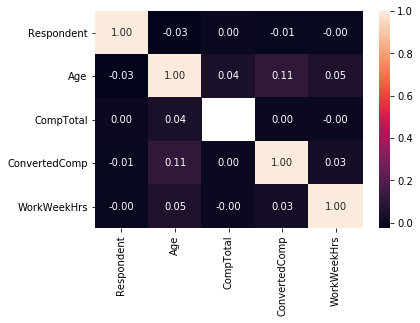

In [17]:
sns.heatmap(df.corr(), annot=True, fmt=".2f");

Ans: Age has the highest corr with Compensation.

Q3: Find the top indicators for compensation

In [42]:
def clean_data(df):

    
    # Drop rows with missing compensation values
    df = df.dropna(subset=['ConvertedComp'], axis=0)
    y = df['ConvertedComp']
    
    #select columns
    df = df.drop(['Respondent', 'ConvertedComp', 'CompTotal'], axis=1)
    df = df[['Age','WorkWeekHrs','EdLevel','NEWDevOps','OrgSize','JobSat','NEWOvertime','NEWLearn','SOPartFreq','SOVisitFreq']]
    #df = df.drop(['Respondent', 'ConvertedComp', 'CompTotal','LanguageDesireNextYear','LanguageWorkedWith','MiscTechDesireNextYear','MiscTechWorkedWith','NEWCollabToolsDesireNextYear','NEWCollabToolsWorkedWith'], axis=1)
    # Fill numeric columns with the mean
    num_vars = df.select_dtypes(include=['float', 'int']).columns
    for col in num_vars:
        df[col].fillna((df[col].mean()), inplace=True)
        
    # Dummy the categorical variables
    cat_vars = df.select_dtypes(include=['object']).copy().columns
    for var in  cat_vars:
        # for each cat add dummy var, drop original column
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    
    X = df
    return X, y
    
#Use the function to create X and y
X, y = clean_data(df)     

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

In [44]:
lm_model = LinearRegression(normalize=True)
lm_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [45]:
def coef_weights(coefficients, X_train):
   
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

coef_df = coef_weights(lm_model.coef_, X_train)

coef_df.head(20)

,est_int,coefs,abs_coefs
15,OrgSize_2 to 9 employees,-52060.189418,52060.189418
19,"OrgSize_Just me - I am a freelancer, sole prop...",-51547.541269,51547.541269
12,OrgSize_10 to 19 employees,-46002.748836,46002.748836
23,JobSat_Very satisfied,29715.779763,29715.779763
7,"EdLevel_Professional degree (JD, MD, etc.)",-26630.098421,26630.098421
16,OrgSize_20 to 99 employees,-25462.948444,25462.948444
39,SOVisitFreq_Less than once per month or monthly,22332.157146,22332.157146
18,OrgSize_500 to 999 employees,-22307.082283,22307.082283
6,EdLevel_Primary/elementary school,20124.849198,20124.849198
14,OrgSize_100 to 499 employees,-20022.500111,20022.500111


In [46]:
from sklearn import metrics
predictions = lm_model.predict(X_test)

print('R-Squared:', metrics.r2_score(y_test, predictions))

R-Squared: 0.0226592829467


Ans: Job satisfaction seems to be the highest positive indicator for compensation, while small company size is more towards negative impact.

Please note that the r-square is low, the model still needs improvement.